# Analyse TagesWoche mit Google Analytics Daten und API Metadaten



In [1]:
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from datetime import datetime

import os

import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pandas.io.json import json_normalize

import urllib.request
import json
import codecs

InteractiveShell.ast_node_interactivity = "all"
matplotlib.rcParams['svg.fonttype'] = 'none'

In [2]:
## define month

month = 'juli_2016'

In [3]:
## load google analyctics data

ga_stats = 'tawo_stats_' + month + '.csv'

stats = pd.read_csv(ga_stats)

stats['article_id'] = stats['Seite'].str.replace('/\w\w/\d\d\d\d_\d\d/\w+/', '')
stats['Seite'] = stats['Seite'].str.replace('/\w\w/\d\d\d\d_\d\d/', '')
stats['section'] = stats['Seite'].str.extract('(\w+)')

stats['article_id'] = pd.to_numeric(stats['article_id'], errors='coerce')
stats['Seitenaufrufe'] = pd.to_numeric(stats['Seitenaufrufe'], errors='coerce')

stats.replace('', np.nan, inplace=True)
stats = stats.dropna()

stats.head()




/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,article_id,section
0,international/724751,30472.0,28207.0,00:05:20,26107.0,"89,41 %","84,49 %","0,00 CHF",724751.0,international
1,basel/725295,18516.0,17199.0,00:04:07,14976.0,"89,02 %","81,48 %","0,00 CHF",725295.0,basel
2,basel/724533,13785.0,12983.0,00:05:56,10961.0,"90,72 %","82,55 %","0,00 CHF",724533.0,basel
3,basel/725275,11986.0,11184.0,00:05:10,10453.0,"91,11 %","86,72 %","0,00 CHF",725275.0,basel
4,international/724826,10741.0,10061.0,00:03:59,8923.0,"90,54 %","83,59 %","0,00 CHF",724826.0,international


In [3]:
def parse_articles(id):
    meta = pd.DataFrame(columns=['type', 'article_id'])
    url = 'http://www.tageswoche.ch/content-api/articles/'
    article_name = url + str(id)
    #print(id)
    try:
        df = pd.read_json(article_name, lines=True)
        meta['type'] = df['type']
        meta['published'] = df['published']
        meta['article_id'] = id
    except:
        pass
        
    return meta

filepath = 'tawo_stats_meta_' + month + '.csv'

if os.path.exists(filepath):
    df = pd.read_csv(filepath, usecols=[1,2,3])
else:
    df = pd.concat([parse_articles(id) for id in stats['article_id']])

df

,article_id,published,type
0,724751.0,2016-07-15,news
1,725295.0,2016-07-22,news
2,724533.0,2016-07-13,news
3,725275.0,2016-07-26,news
4,724826.0,2016-07-16,news
5,725703.0,2016-07-29,news
6,723646.0,2016-07-01,news
7,723564.0,2016-07-01,news
8,725129.0,2016-07-20,news
9,724790.0,2016-07-15,newswire


In [91]:
df['published'] = df['published'].str.extract('(\d\d\d\d-\d\d-\d\d)')

df = df[df.published != '0001-11-30']

df['published'] = pd.to_datetime(df['published'], format='%Y-%m-%d')

df

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,article_id,published,type
0,724751.0,2016-07-15,news
0,725295.0,2016-07-22,news
0,724533.0,2016-07-13,news
0,725275.0,2016-07-26,news
0,724826.0,2016-07-16,news
0,725703.0,2016-07-29,news
0,723646.0,2016-07-01,news
0,723564.0,2016-07-01,news
0,725129.0,2016-07-20,news
0,724790.0,2016-07-15,newswire


In [92]:
df.to_csv(filepath)

In [93]:
df = df.merge(stats, left_on='article_id', right_on='article_id')

df

,article_id,published,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section
0,724751.0,2016-07-15,news,international/724751,30472.0,28207.0,00:05:20,26107.0,"89,41 %","84,49 %","0,00 CHF",international
1,725295.0,2016-07-22,news,basel/725295,18516.0,17199.0,00:04:07,14976.0,"89,02 %","81,48 %","0,00 CHF",basel
2,724533.0,2016-07-13,news,basel/724533,13785.0,12983.0,00:05:56,10961.0,"90,72 %","82,55 %","0,00 CHF",basel
3,725275.0,2016-07-26,news,basel/725275,11986.0,11184.0,00:05:10,10453.0,"91,11 %","86,72 %","0,00 CHF",basel
4,724826.0,2016-07-16,news,international/724826,10741.0,10061.0,00:03:59,8923.0,"90,54 %","83,59 %","0,00 CHF",international
5,725703.0,2016-07-29,news,basel/725703,10112.0,9471.0,00:06:51,7948.0,"91,04 %","83,30 %","0,00 CHF",basel
6,723646.0,2016-07-01,news,kultur/723646,8810.0,8335.0,00:03:04,6546.0,"91,19 %","78,54 %","0,00 CHF",kultur
7,723564.0,2016-07-01,news,basel/723564,7870.0,7498.0,00:02:37,6278.0,"89,73 %","80,38 %","0,00 CHF",basel
8,725129.0,2016-07-20,news,basel/725129,7662.0,7183.0,00:02:55,6144.0,"90,77 %","81,04 %","0,00 CHF",basel
9,724790.0,2016-07-15,newswire,schweiz/724790,7365.0,6844.0,00:02:20,5564.0,"86,92 %","75,93 %","0,00 CHF",schweiz


In [94]:
scrape_file = 'ga_stats_merged_' + month + '.csv'

df.to_csv(scrape_file)

In [95]:
df['type'] = df['type'].astype('category')

df_news = df[(df.type == 'news')]

df_newswire = df[(df.type == 'newswire')]

df['type'].value_counts()

news             2456
newswire         1314
deb_moderator       6
blog                6
Name: type, dtype: int64

In [96]:
df_newswire['Seitenaufrufe'].sum()

78264.0

In [97]:
df_news['Seitenaufrufe'].sum()

568156.0

In [99]:
data_subset_news = df_news.set_index(['published'])

data_subset_news_month = data_subset_news.loc['2016-07-01':'2016-07-31']
data_subset_news_month['Seitenaufrufe'].sum()

453090.0

In [100]:
data_subset_news_month.sort_values('Seitenaufrufe', ascending=False).head()

,article_id,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section
published,,,,,,,,,,,
2016-07-15,724751.0,news,international/724751,30472.0,28207.0,00:05:20,26107.0,"89,41 %","84,49 %","0,00 CHF",international
2016-07-22,725295.0,news,basel/725295,18516.0,17199.0,00:04:07,14976.0,"89,02 %","81,48 %","0,00 CHF",basel
2016-07-13,724533.0,news,basel/724533,13785.0,12983.0,00:05:56,10961.0,"90,72 %","82,55 %","0,00 CHF",basel
2016-07-26,725275.0,news,basel/725275,11986.0,11184.0,00:05:10,10453.0,"91,11 %","86,72 %","0,00 CHF",basel
2016-07-16,724826.0,news,international/724826,10741.0,10061.0,00:03:59,8923.0,"90,54 %","83,59 %","0,00 CHF",international


In [101]:
data_subset_news_month.reset_index().sort_values('published')

data_subset_news_month.groupby(['section']).Seitenaufrufe.sum()

data_subset_news_month['section'].value_counts()

,published,article_id,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section
226,2016-07-01,723594.0,news,basel/723594,283.0,263.0,00:02:26,70.0,"65,71 %","49,12 %","0,00 CHF",basel
64,2016-07-01,723533.0,news,sport/723533,2085.0,1982.0,00:06:00,606.0,"79,54 %","56,55 %","0,00 CHF",sport
191,2016-07-01,723596.0,news,kultur/723596,482.0,449.0,00:04:04,180.0,"80,00 %","56,02 %","0,00 CHF",kultur
182,2016-07-01,723543.0,news,international/723543,547.0,506.0,00:01:51,228.0,"64,91 %","48,99 %","0,00 CHF",international
207,2016-07-01,723625.0,news,basel/723625,374.0,341.0,00:02:28,38.0,"68,42 %","39,57 %","0,00 CHF",basel
210,2016-07-01,723613.0,news,sport/723613,366.0,297.0,00:02:27,134.0,"88,81 %","56,83 %","0,00 CHF",sport
176,2016-07-01,723506.0,news,basel/723506,574.0,500.0,00:02:33,229.0,"64,63 %","43,73 %","0,00 CHF",basel
81,2016-07-01,723622.0,news,sport/723622,1676.0,1573.0,00:02:36,938.0,"86,57 %","68,97 %","0,00 CHF",sport
164,2016-07-01,723448.0,news,basel/723448,668.0,608.0,00:03:13,210.0,"71,43 %","42,96 %","0,00 CHF",basel
63,2016-07-01,717663.0,news,kultur/717663,2086.0,1918.0,00:04:57,1443.0,"87,11 %","74,98 %","0,00 CHF",kultur


section
basel            221075.0
international     65307.0
kultur            38090.0
leben             18382.0
schweiz            7452.0
sport            102784.0
Name: Seitenaufrufe, dtype: float64

basel            112
sport             59
kultur            40
international     26
leben             19
schweiz            6
Name: section, dtype: int64

In [103]:
data_subset_newswire = df_newswire.set_index(['published'])

data_subset_newswire_month = data_subset_newswire.loc['2016-07-01':'2016-07-31']

data_subset_newswire_month['Seitenaufrufe'].sum()

74021.0

In [104]:
data_subset_newswire_month.reset_index().sort_values('published').head()

data_subset_newswire_month.groupby(['section']).Seitenaufrufe.sum()

data_subset_newswire_month['section'].value_counts()


,published,article_id,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section
923,2016-07-01,723651.0,newswire,schweiz/723651,11.0,11.0,00:01:12,6.0,"100,00 %","63,64 %","0,00 CHF",schweiz
706,2016-07-01,723664.0,newswire,international/723664,15.0,15.0,00:01:52,0.0,"0,00 %","33,33 %","0,00 CHF",international
993,2016-07-01,723604.0,newswire,international/723604,10.0,10.0,00:01:02,0.0,"0,00 %","20,00 %","0,00 CHF",international
758,2016-07-01,723645.0,newswire,international/723645,14.0,14.0,00:02:54,2.0,"50,00 %","21,43 %","0,00 CHF",international
80,2016-07-01,723637.0,newswire,basel/723637,136.0,130.0,00:01:15,0.0,"0,00 %","19,85 %","0,00 CHF",basel


section
basel             7718.0
international    17764.0
kultur            3503.0
schweiz          26984.0
sport            18052.0
Name: Seitenaufrufe, dtype: float64

international    327
sport            326
schweiz          294
basel            143
kultur            71
Name: section, dtype: int64

In [105]:
data_subset_news_month = data_subset_news_month.reset_index()

In [106]:
data_subset_news_month.head()

,published,article_id,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section
0,2016-07-15,724751.0,news,international/724751,30472.0,28207.0,00:05:20,26107.0,"89,41 %","84,49 %","0,00 CHF",international
1,2016-07-22,725295.0,news,basel/725295,18516.0,17199.0,00:04:07,14976.0,"89,02 %","81,48 %","0,00 CHF",basel
2,2016-07-13,724533.0,news,basel/724533,13785.0,12983.0,00:05:56,10961.0,"90,72 %","82,55 %","0,00 CHF",basel
3,2016-07-26,725275.0,news,basel/725275,11986.0,11184.0,00:05:10,10453.0,"91,11 %","86,72 %","0,00 CHF",basel
4,2016-07-16,724826.0,news,international/724826,10741.0,10061.0,00:03:59,8923.0,"90,54 %","83,59 %","0,00 CHF",international


In [108]:
#data_subset_news_september.resample('D', how='count')


data_subset_news_month['week'] = data_subset_news_month['published'].dt.week

data_subset_news_month.head()


,published,article_id,type,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,section,week
0,2016-07-15,724751.0,news,international/724751,30472.0,28207.0,00:05:20,26107.0,"89,41 %","84,49 %","0,00 CHF",international,28
1,2016-07-22,725295.0,news,basel/725295,18516.0,17199.0,00:04:07,14976.0,"89,02 %","81,48 %","0,00 CHF",basel,29
2,2016-07-13,724533.0,news,basel/724533,13785.0,12983.0,00:05:56,10961.0,"90,72 %","82,55 %","0,00 CHF",basel,28
3,2016-07-26,725275.0,news,basel/725275,11986.0,11184.0,00:05:10,10453.0,"91,11 %","86,72 %","0,00 CHF",basel,30
4,2016-07-16,724826.0,news,international/724826,10741.0,10061.0,00:03:59,8923.0,"90,54 %","83,59 %","0,00 CHF",international,28


In [111]:
data_subset_news_month.groupby(['week', 'section']).Seitenaufrufe.sum().to_csv("week_pageviews.csv")

### Scrape für Autoren

In [112]:
import urllib.request
import json
import codecs

def get_authors(id):
    result = pd.DataFrame(columns=['authors', 'id'])
    i = 0;
    url = 'http://www.tageswoche.ch/content-api/articles/' + str(id)
    try:
        response = urllib.request.urlopen(url)
        reader = codecs.getreader("utf-8")
        obj = json.load(reader(response))
        for i in range(0, len(obj['authors'])):
            result.loc[i] = obj['authors'][i]['name']
    except:
        result['authors'] = ''
        pass
    print(id)
    result['id'] = id
    return result #create a series


authors = pd.concat([get_authors(id) for id in data_subset_news_month['article_id']])

724751.0
725295.0
724533.0
725275.0
724826.0
725703.0
723646.0
723564.0
725129.0
724127.0
724625.0
724047.0
724825.0
725305.0
723504.0
725227.0
725831.0
724381.0
725725.0
723559.0
724763.0
724693.0
724978.0
724718.0
724732.0
724624.0
725198.0
725815.0
725385.0
724611.0
725308.0
723566.0
724891.0
723861.0
724401.0
723567.0
725224.0
724816.0
724375.0
725786.0
723826.0
725023.0
725244.0
725647.0
724262.0
725798.0
724459.0
725141.0
723840.0
724235.0
723992.0
725406.0
724530.0
723854.0
724148.0
724034.0
725271.0
725045.0
725529.0
725087.0
725897.0
724438.0
725475.0
717663.0
723533.0
724006.0
725478.0
725458.0
724853.0
725185.0
725826.0
724666.0
725310.0
724682.0
723795.0
725508.0
724672.0
725196.0
725058.0
724057.0
724638.0
723622.0
725046.0
724792.0
725477.0
724157.0
724783.0
723912.0
725330.0
725530.0
724974.0
725036.0
724243.0
724599.0
721477.0
725014.0
725288.0
724930.0
723749.0
723847.0
723661.0
724103.0
723638.0
725488.0
724258.0
724226.0
724242.0
724005.0
724876.0
723932.0
723709.0
7

In [114]:
subset_authors = data_subset_news_month.merge(authors, left_on='article_id', right_on='id')

subset_authors = subset_authors[['article_id', 'authors', 'Seitenaufrufe', 'published']]

subset_authors.head(50)

sub = subset_authors.groupby(['authors']).Seitenaufrufe.count()

sub.reset_index()

sub.to_csv('authors_article_sum.csv')

,article_id,authors,Seitenaufrufe,published
0,724751.0,Gabriel Brönnimann,30472.0,2016-07-15
1,725295.0,Jeremias Schulthess,18516.0,2016-07-22
2,724533.0,Renato Beck,13785.0,2016-07-13
3,725275.0,Matthias Oppliger,11986.0,2016-07-26
4,724826.0,Matthias Oppliger,10741.0,2016-07-16
5,725703.0,Gabriel Brönnimann,10112.0,2016-07-29
6,723646.0,Marc Krebs,8810.0,2016-07-01
7,723564.0,Yen Duong,7870.0,2016-07-01
8,725129.0,Renato Beck,7662.0,2016-07-20
9,724127.0,Jeremias Schulthess,6546.0,2016-07-08


,authors,Seitenaufrufe
0,Adrian Lobe,3
1,Adrian Schräder,1
2,Ali Farhat,1
3,Amir Mustedanagić,1
4,Andrea Fopp,3
5,Andreas Knobloch,1
6,Andreas Schneitter,2
7,Andreas Schwald,1
8,Antonia Brand,3
9,Astrid Frefel,2


In [87]:
subset_authors.tail()

,article_id,authors,Seitenaufrufe,published
303,728098.0,Christian Degen,63.0,2016-08-25
304,727495.0,Christian Degen,14.0,2016-08-18
305,727409.0,Renato Beck,10.0,2016-08-27
306,727409.0,Felix Michel,10.0,2016-08-27
307,727409.0,Stefan Kempf,10.0,2016-08-27


### Scrape für Article Types

In [ ]:
article_types = pd.read_csv('article_types.csv')

In [ ]:
article_types

In [ ]:
def type_count(type):
    result = {}
    url = 'http://www.tageswoche.ch/content-api/articles?type=' + str(type)
    response = urllib.request.urlopen(url)
    reader = codecs.getreader("utf-8")
    obj = json.load(reader(response))
    result['type'] = type
    try:
        count = obj['pagination']['itemsCount']
        result['count'] = count
        print(count)
    except:
        result['count'] = 'weniger als 10'
        pass
    
    return pd.Series(result) #create a series

#type_count('static_page')

all_type_counts = article_types['types'].apply(type_count)

In [ ]:
all_type_counts

In [ ]:
all_type_counts.to_csv('type_count.csv')

## Topic-Auswertung

In [2]:
url = 'http://www.tageswoche.ch/content-api/topics?items_per_page=1000'
response = urllib.request.urlopen(url)
reader = codecs.getreader("utf-8")
obj = json.load(reader(response))

topics = pd.DataFrame(columns=['title', 'topic_id', 'path', 'level'])

for i in range(0, len(obj['items'])):
    topics.loc[i, 'title'] = obj['items'][i]['title']
    topics.loc[i, 'topic_id'] = obj['items'][i]['id']
    topics.loc[i, 'path'] = obj['items'][i]['path']
    topics.loc[i, 'level'] = obj['items'][i]['level']
    
topics['path'] = topics['path'].str.split(' / ')


for i in range(0, len(topics['path'])):
    try:
        topics.loc[i, 'level0'] = topics['path'][i][1]
    except:
        topics.loc[i, 'level0'] = ''     
    try:
        topics.loc[i, 'level1'] = topics['path'][i][2]
    except:
        topics.loc[i, 'level1'] = ''
    try:
        topics.loc[i, 'level2'] = topics['path'][i][3]
    except:
        topics.loc[i, 'level2'] = ''
    try:
        topics.loc[i, 'level3'] = topics['path'][i][4]
    except:
        topics.loc[i, 'level3'] = ''
        
    
topics = topics[['topic_id', 'level0', 'level1', 'level2', 'level3', 'title']]
topics['level0'].nunique()

100

In [3]:
topics.head()

,topic_id,level0,level1,level2,level3,title
0,2,Sport,,,,Sport
1,3,Sport,Fussball,FC Basel,,FC Basel
2,4,Sport,Handball,,,Handball
3,5,_Länder,,,,_Länder
4,6,_Länder,Europa,,,Europa


In [4]:
def get_articles_by_topic(id):
    print(id)
    topics = pd.DataFrame(columns=['article_id', 'topic_id'])
    result = pd.DataFrame(columns=['article_id', 'topic_id'])
    i = 0;
    try:
        url = 'http://www.tageswoche.ch/content-api/topics/' + str(id) + '/de/articles'
        response = urllib.request.urlopen(url)
        reader = codecs.getreader("utf-8")
        obj = json.load(reader(response))
        itemsCount = obj['pagination']['itemsCount']
        itemsPages = np.ceil(itemsCount / 10) + 1
        page = 1;
        for page in range(1, int(itemsPages)):
            try:
                url_pages = url + '?page=' + str(page) + '&items_per_page=10'
                response = urllib.request.urlopen(url_pages)
                reader = codecs.getreader("utf-8")
                obj = json.load(reader(response))
                for i in range(0, len(obj['items'])):
                    result.loc[i, 'article_id'] = obj['items'][i]['number']
                    result.loc[i, 'published'] = obj['items'][i]['published']
            except:
                result['article_id'] = ''
                result['published'] = ''
                pass

            topics = topics.append(result)
    except:
        try:
            print('no-pagination')
            url = 'http://www.tageswoche.ch/content-api/topics/' + str(id) + '/de/articles'
            response = urllib.request.urlopen(url)
            reader = codecs.getreader("utf-8")
            obj = json.load(reader(response))
            for i in range(0, len(obj['items'])):
                topics.loc[i, 'article_id'] = obj['items'][i]['number']
                topics.loc[i, 'published'] = obj['items'][i]['published']
        except:
            print('error')
            pass
    
    topics['topic_id'] = id
    topics = topics.drop_duplicates()
    print('success')
    #topics = topics.reset_index()
    #topics = topics[['article_id', 'topic_id']]
    return topics


if os.path.exists('articles_by_topic.csv'):
    articles_by_topic = pd.read_csv('articles_by_topic.csv', usecols=[1,2,3])
else:
    articles_by_topic = pd.concat([get_articles_by_topic(id) for id in topics['topic_id']])
    articles_by_topic = articles_by_topic.reset_index()
    articles_by_topic = articles_by_topic[['article_id', 'published', 'topic_id']]
    articles_by_topic.to_csv('articles_by_topic.csv')

articles_by_topic.head()

,article_id,published,topic_id
0,739270.0,2017-01-06T18:12:00+0100,2
1,739242.0,2017-01-06T15:01:20+0100,2
2,739229.0,2017-01-06T12:15:07+0100,2
3,739226.0,2017-01-06T11:50:02+0100,2
4,739151.0,2017-01-05T15:45:04+0100,2


In [5]:
articles_by_topic['published'] = articles_by_topic['published'].str.extract('(\d\d\d\d-\d\d-\d\d)')

articles_by_topic = articles_by_topic[articles_by_topic.published != '0001-11-30']

articles_by_topic['published'] = pd.to_datetime(articles_by_topic['published'], format='%Y-%m-%d')

articles_by_topic.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,article_id,published,topic_id
0,739270.0,2017-01-06,2
1,739242.0,2017-01-06,2
2,739229.0,2017-01-06,2
3,739226.0,2017-01-06,2
4,739151.0,2017-01-05,2


In [6]:
articles_by_topic_2016 = articles_by_topic.set_index(['published'])

articles_by_topic_2016 = articles_by_topic_2016.loc['2016-01-01':'2016-12-31']

articles_by_topic_2016 = articles_by_topic_2016.reset_index()

articles_by_topic_2016.tail()

,published,article_id,topic_id
14649,2016-12-15,737452.0,1049
14650,2016-12-03,736510.0,1049
14651,2016-11-20,735244.0,1049
14652,2016-12-01,736324.0,1050
14653,2016-12-27,738312.0,1055


In [7]:
articles_by_topic['article_id'].nunique()
articles_by_topic_2016['article_id'].nunique()

articles_by_topic['topic_id'].nunique()
articles_by_topic_2016['topic_id'].nunique()

43174

5274

840

609

In [8]:
## load google analyctics data

ga_stats = 'tawo_ga_analytics_2016.csv'

stats_2016 = pd.read_csv(ga_stats)

stats_2016['url'] = stats_2016['Seite'].str.split('/')

for i in range(0, len(stats_2016['url'])):   
    try:
        stats_2016.loc[i, 'article_id'] = stats_2016['url'][i][4]
    except:
        stats_2016.loc[i, 'article_id'] = ''
        
stats_2016['article_id'] = pd.to_numeric(stats_2016['article_id'], errors='coerce')
stats_2016['Seitenaufrufe'] = pd.to_numeric(stats_2016['Seitenaufrufe'], errors='coerce')

stats_2016 = stats_2016.dropna()

stats_2016.head()


,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,url,article_id
1,/de/2015_06/leben/679721,47570,44358,00:04:55,44262,"92,16 %","91,17 %","0,00 CHF","[, de, 2015_06, leben, 679721]",679721.0
3,/de/2016_8/basel/711878,38175,32952,00:05:24,28632,"82,21 %","75,36 %","0,00 CHF","[, de, 2016_8, basel, 711878]",711878.0
4,/de/2016_2/schweiz/707881,37126,34222,00:04:39,30885,"88,38 %","83,15 %","0,00 CHF","[, de, 2016_2, schweiz, 707881]",707881.0
6,/de/2016_29/international/724751,30947,28654,00:05:19,26522,"89,45 %","84,54 %","0,00 CHF","[, de, 2016_29, international, 724751]",724751.0
7,/de/2015_29/international/693833,28841,21951,00:02:16,21914,"77,39 %","75,82 %","0,00 CHF","[, de, 2015_29, international, 693833]",693833.0


In [9]:
stats_2016[(stats_2016.article_id == 709304)]

,Seite,Seitenaufrufe,Einzelne Seitenaufrufe,Durchschn Besuchszeit auf Seite,Einstiege,Absprungrate,% Ausstiege,Seitenwert,url,article_id
1206,/de/2016_4/schweiz/709304,1983,1836,00:05:08,1577,"91,31 %","83,16 %","0,00 CHF","[, de, 2016_4, schweiz, 709304]",709304.0
14521,/de/2016_4/schweiz/709304/Könnten-wir-nicht-di...,37,24,00:01:22,24,"50,00 %","54,05 %","0,00 CHF","[, de, 2016_4, schweiz, 709304, Könnten-wir-ni...",709304.0


In [10]:
stats_2016 = stats_2016.groupby(by=['article_id']).Seitenaufrufe.sum()
stats_2016 = stats_2016.to_frame(name = 'Seitenaufrufe')
stats_2016 = stats_2016.reset_index()

stats_2016.head()

,article_id,Seitenaufrufe
0,1.0,807
1,2.0,31
2,3.0,35
3,4.0,25
4,10.0,89


In [11]:
stats_2016[(stats_2016.article_id == 709304)]

,article_id,Seitenaufrufe
8266,709304.0,2020


In [12]:
topics_stats = articles_by_topic_2016.merge(stats_2016, left_on='article_id', right_on='article_id')

topics_stats = topics_stats[['article_id', 'topic_id', 'Seitenaufrufe']]

topics_stats.head()

,article_id,topic_id,Seitenaufrufe
0,737068.0,2,451
1,737068.0,3,451
2,737068.0,26,451
3,737068.0,285,451
4,737068.0,441,451


In [13]:
topics_stats_details = topics_stats.merge(topics, left_on='topic_id', right_on='topic_id')

topics_stats_details = topics_stats_details[['article_id', 'topic_id', 'title', 'level0', 'level1', 'level2', 'level3', 'Seitenaufrufe']]

topics_stats_details.head()

,article_id,topic_id,title,level0,level1,level2,level3,Seitenaufrufe
0,737068.0,2,Sport,Sport,,,,451
1,737478.0,2,Sport,Sport,,,,806
2,737388.0,2,Sport,Sport,,,,5030
3,737365.0,2,Sport,Sport,,,,322
4,737363.0,2,Sport,Sport,,,,221


In [14]:
topics_stats_details[(topics_stats_details.article_id == 720914)]

,article_id,topic_id,title,level0,level1,level2,level3,Seitenaufrufe
9011,720914.0,625,Gleichstellung,Gesellschaft,Gleichstellung,,,405
9131,720914.0,503,Arbeit,Gesellschaft,Arbeit,,,405
12515,720914.0,1021,50 Jahre Frauenstimmrecht,_Zeitgeschichte,50 Jahre Frauenstimmrecht,,,405


In [15]:
median_topics = topics_stats_details.groupby(by=['topic_id']).Seitenaufrufe.median().sort_values(ascending=False)
median_topics = median_topics.to_frame(name = 'median')
median_topics = median_topics.reset_index()

median_topics.head()

,topic_id,median
0,752,27387.0
1,299,15529.5
2,768,12950.5
3,35,8788.0
4,440,6862.0


In [16]:
median_topics['topic_id'].nunique()

topics_stats_details['article_id'].nunique()

605

4938

In [17]:
min_topics = topics_stats_details.groupby(by=['topic_id']).Seitenaufrufe.min()
min_topics = min_topics.to_frame(name = 'min')
min_topics = min_topics.reset_index()

min_topics.head()

,topic_id,min
0,2,22
1,3,23
2,4,122
3,5,75
4,6,27


In [18]:
max_topics = topics_stats_details.groupby(by=['topic_id']).Seitenaufrufe.max()
max_topics = max_topics.to_frame(name = 'max')
max_topics = max_topics.reset_index()

max_topics.head()

,topic_id,max
0,2,23104
1,3,23104
2,4,642
3,5,5141
4,6,30947


In [19]:
pageviews_topics = topics_stats_details.groupby(by=['topic_id'])['Seitenaufrufe'].sum().sort_values(ascending=False)
pageviews_topics = pageviews_topics.to_frame(name = 'pageviews')

pageviews_topics = pageviews_topics.reset_index()

pageviews_topics['topic_id'].replace('', np.nan, inplace=True)

pageviews_topics = pageviews_topics.dropna()

pageviews_topics.head()

,topic_id,pageviews
0,2,1151570
1,26,1148905
2,3,920910
3,1007,307383
4,28,298275


In [20]:
count_topics = topics_stats_details.groupby(by=['topic_id'])['article_id'].count().sort_values(ascending=False)
count_topics = count_topics.to_frame(name = 'count')

count_topics = count_topics.reset_index()
count_topics['topic_id'].replace('', np.nan, inplace=True)

count_topics = count_topics.dropna()

count_topics.head()

,topic_id,count
0,2,884
1,26,813
2,3,484
3,18,248
4,129,220


In [21]:
topics_count_pageviews = count_topics.merge(pageviews_topics, left_on='topic_id', right_on='topic_id')
topics_count_pageviews['average'] = topics_count_pageviews['pageviews'] /  topics_count_pageviews['count']

In [22]:
topics_count_pageviews.head()

,topic_id,count,pageviews,average
0,2,884,1151570,1302.680995
1,26,813,1148905,1413.167282
2,3,484,920910,1902.706612
3,18,248,290811,1172.625000
4,129,220,242740,1103.363636


In [23]:
topics_count_pageviews_median = topics_count_pageviews.merge(median_topics, left_on='topic_id', right_on='topic_id')

topics_count_pageviews_median.head()

,topic_id,count,pageviews,average,median
0,2,884,1151570,1302.680995,807.5
1,26,813,1148905,1413.167282,957.0
2,3,484,920910,1902.706612,1556.5
3,18,248,290811,1172.625000,488.5
4,129,220,242740,1103.363636,692.5


In [24]:
topics_count_pageviews_median_min = topics_count_pageviews_median.merge(min_topics, 
                                                                        left_on='topic_id', right_on='topic_id')

topics_count_pageviews_median_min_max = topics_count_pageviews_median_min.merge(max_topics, 
                                                                        left_on='topic_id', right_on='topic_id')

topics_count_pageviews_median_min_max.head()

,topic_id,count,pageviews,average,median,min,max
0,2,884,1151570,1302.680995,807.5,22,23104
1,26,813,1148905,1413.167282,957.0,22,23104
2,3,484,920910,1902.706612,1556.5,23,23104
3,18,248,290811,1172.625000,488.5,24,19312
4,129,220,242740,1103.363636,692.5,40,9825


In [25]:
topics_export = topics_count_pageviews_median_min_max.merge(topics, left_on='topic_id', right_on='topic_id')
topics_export.to_csv('topics_export_2016.csv')

topics_export.head()

,topic_id,count,pageviews,average,median,min,max,level0,level1,level2,level3,title
0,2,884,1151570,1302.680995,807.5,22,23104,Sport,,,,Sport
1,26,813,1148905,1413.167282,957.0,22,23104,Sport,Fussball,,,Fussball
2,3,484,920910,1902.706612,1556.5,23,23104,Sport,Fussball,FC Basel,,FC Basel
3,18,248,290811,1172.625000,488.5,24,19312,Politik,,,,Politik
4,129,220,242740,1103.363636,692.5,40,9825,Kultur,,,,Kultur


In [26]:
topics_viz = topics_stats_details.set_index('topic_id')
topics_viz = topics_viz.loc[[1042, 646, 201, 976, 851, 143, 466, 595, 1029, 1025]]
topics_viz = topics_viz.reset_index()

topics_viz.head()

,topic_id,article_id,title,level0,level1,level2,level3,Seitenaufrufe
0,1042,732096.0,Wahlumfrage,Politik,Abstimmungen & Wahlen,Wahlen BS 2016,Wahlumfrage,1982
1,1042,730239.0,Wahlumfrage,Politik,Abstimmungen & Wahlen,Wahlen BS 2016,Wahlumfrage,1537
2,1042,730187.0,Wahlumfrage,Politik,Abstimmungen & Wahlen,Wahlen BS 2016,Wahlumfrage,482
3,1042,729899.0,Wahlumfrage,Politik,Abstimmungen & Wahlen,Wahlen BS 2016,Wahlumfrage,2242
4,1042,729412.0,Wahlumfrage,Politik,Abstimmungen & Wahlen,Wahlen BS 2016,Wahlumfrage,2745


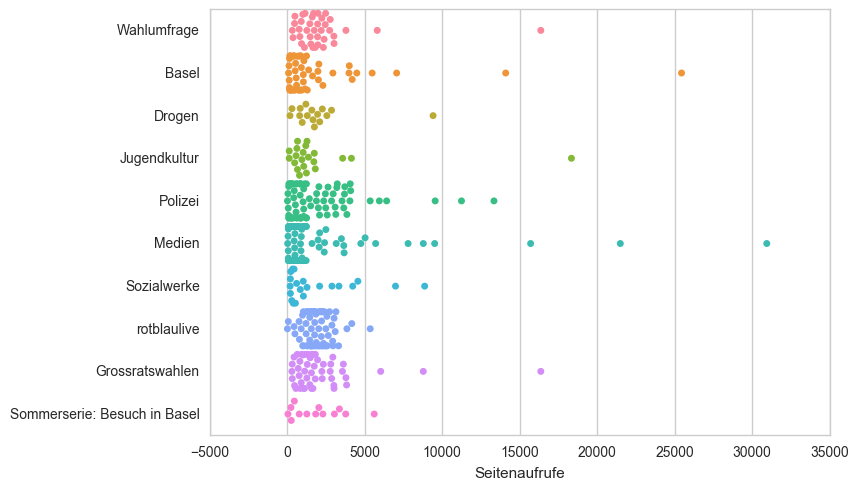

In [27]:
import seaborn as sns

sns.set_style("whitegrid")
#topics = sns.load_dataset("topics_export")
#ax = sns.boxplot(x=topics_stats_details['Seitenaufrufe'])

ax = sns.swarmplot(y=topics_viz['title'], x=topics_viz['Seitenaufrufe'], orient='h')
ax.yaxis.label.set_visible(False)

In [41]:
topic_count_top400 = topics_export.sort_values('count', ascending=False)

topic_count_top400 = topic_count_top400.head(400)

topic_count_top400 = topic_count_top400[['topic_id']]

In [42]:
topic_average_top400 = topics_export.sort_values('average', ascending=False)

topic_average_top400 = topic_average_top400.head(400)

topic_average_top400.head()

,topic_id,count,pageviews,average,median,min,max,level0,level1,level2,level3,title
590,752,1,27387,27387.000000,27387.0,27387,27387,_Länder,Naher Osten,Jordanien,,Jordanien
496,299,2,31059,15529.500000,15529.5,112,30947,_Länder,Afrika,Tunesien,,Tunesien
474,768,2,25901,12950.500000,12950.5,454,25447,_Textformen & feste Rubriken,Ausflugstipps,,,Ausflugstipps
408,35,3,35320,11773.333333,8788.0,5034,21498,_Personen,Markus Somm,,,Markus Somm
431,440,3,23863,7954.333333,6862.0,6012,10989,Gesellschaft,Sekten,,,Sekten


In [44]:
topics_selection = topic_average_top400.merge(topic_count_top400, left_on='topic_id', right_on='topic_id')
topics_selection

,topic_id,count,pageviews,average,median,min,max,level0,level1,level2,level3,title
0,740,5,28915,5783.000000,482.0,70,27387,_Länder,Naher Osten,Palästina,,Palästina
1,451,5,28162,5632.400000,5034.0,331,14179,_Personen,Christoph Blocher,,,Christoph Blocher
2,324,6,32292,5382.000000,353.5,161,27387,_Länder,Naher Osten,Libanon,,Libanon
3,771,5,26393,5278.600000,2266.0,236,21122,_Quartiere,Gundeli,,,Gundeli
4,793,4,20359,5089.750000,888.5,237,18345,Medien,Watson,,,Watson
5,634,11,55773,5070.272727,1230.0,413,18345,Medien,Soziale Medien,,,Soziale Medien
6,1004,25,122358,4894.320000,3689.0,579,18345,_Zeitgeschichte,Knackeboul,,,Knackeboul
7,358,9,40580,4508.888889,1793.0,528,21498,Medien,Basler Zeitung,,,Basler Zeitung
8,491,9,40262,4473.555556,1921.0,42,25447,_Jahreszeiten,Sommer,,,Sommer
9,415,5,21606,4321.200000,787.0,114,15648,Wirtschaft,Musikindustrie,,,Musikindustrie


In [47]:
topics_selection.sort_values('count', ascending=False)
topics_selection.to_csv('topics_selection.csv')

,topic_id,count,pageviews,average,median,min,max,level0,level1,level2,level3,title
180,2,884,1151570,1302.680995,807.5,22,23104,Sport,,,,Sport
152,26,813,1148905,1413.167282,957.0,22,23104,Sport,Fussball,,,Fussball
82,3,484,920910,1902.706612,1556.5,23,23104,Sport,Fussball,FC Basel,,FC Basel
208,18,248,290811,1172.625000,488.5,24,19312,Politik,,,,Politik
222,129,220,242740,1103.363636,692.5,40,9825,Kultur,,,,Kultur
233,141,212,222145,1047.853774,396.0,22,11818,Wirtschaft,,,,Wirtschaft
276,288,173,157463,910.190751,282.0,22,14103,Politik,_Themen,Migration,,Migration
118,285,168,275455,1639.613095,1414.0,23,14934,Sport,Fussball,Swiss Football League SFL,,Swiss Football League SFL
164,975,165,226061,1370.066667,436.0,22,27387,Politik,_Themen,Migration,Flüchtlinge,Flüchtlinge
81,28,156,298275,1912.019231,949.0,22,38175,Gesellschaft,,,,Gesellschaft


In [54]:
topics_selection_migration = pd.read_csv('topics_selection_migration.csv', header=None, names=['topic_id'])
topics_selection_migration.head()

,topic_id
0,2
1,26
2,3
3,18
4,129


In [66]:
topics_all = articles_by_topic.set_index('topic_id')

topics_all = topics_all.drop(topics_selection_migration['topic_id'])

topics_all = topics_all.reset_index()

topics_all['topic_id'].nunique()

547

In [67]:
topics_all = topics_all[['topic_id']]

topics_all = topics_all.drop_duplicates()

In [68]:
topics_all = topics_all.merge(topics, left_on='topic_id', right_on='topic_id')

topics_all.head()

,topic_id,level0,level1,level2,level3,title
0,4,Sport,Handball,,,Handball
1,7,_Länder,Europa,Schweiz,,Schweiz
2,15,Veranstaltung,Movie Veranstaltung,,,Movie Veranstaltung
3,21,_Zeitgeschichte,Finanzkrise,,,Finanzkrise
4,22,Politik,Europäische Union,,,Europäische Union


In [69]:
topics_all.to_csv('topics_rest_migration.csv')

## News / Newswire / Published for GA stats from 2016

In [6]:
stats_2016 = stats_2016.head(50)

In [7]:
stats_2016_details = pd.concat([parse_articles(id) for id in stats_2016['article_id']])

In [8]:
stats_2016_details

,type,article_id,published
0,news,679721.0,2015-02-04T16:16:16+0100
0,news,711878.0,2016-02-18T14:27:11+0100
0,news,707881.0,2016-01-06T12:02:33+0100
0,news,724751.0,2016-07-15T10:43:27+0200
0,news,693833.0,2015-07-20T11:56:12+0200
0,news,715515.0,2016-04-01T03:04:25+0200
0,news,664044.0,2016-08-06T04:50:05+0200
0,news,715519.0,2016-03-31T13:47:48+0200
0,news,716378.0,2016-04-11T16:56:51+0200
0,news,677635.0,2015-01-24T06:00:02+0100
